In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cal = pd.read_csv('calendar.csv')
li = pd.read_csv('listings.csv')
rev = pd.read_csv('reviews.csv')

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
li.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
rev.listing_id.nunique()

3191

In [7]:
rev.shape

(84849, 6)

In [8]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [9]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
cal.dropna(inplace=True)
cal['price'] = cal['price'].str.replace('[$,]', '', regex=True).astype(float)
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [11]:
cal.date = pd.to_datetime(cal.date)
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [12]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [13]:
cal.available.unique()

array(['t'], dtype=object)

In [14]:
cal.drop(columns = ['available'], axis = 1, inplace = True)
cal.head(3)

,listing_id,date,price
0,241032,2016-01-04,85.0
1,241032,2016-01-05,85.0
9,241032,2016-01-13,85.0


In [15]:
cal['month'] = cal.date.dt.month
cal['year'] = cal.date.dt.year
cal.head(3)

,listing_id,date,price,month,year
0,241032,2016-01-04,85.0,1,2016
1,241032,2016-01-05,85.0,1,2016
9,241032,2016-01-13,85.0,1,2016


In [16]:
avg_price_per_month = cal.groupby('month')['price'].mean().to_frame()
avg_price_per_month['month'] = avg_price_per_month.index
avg_price_per_month.index = np.arange(avg_price_per_month.shape[0])
avg_price_per_month

,price,month
0,122.912176,1
1,124.293927,2
2,128.644488,3
3,135.097005,4
4,139.538183,5
5,147.473137,6
6,152.094150,7
7,150.656594,8
8,143.255949,9
9,137.031939,10


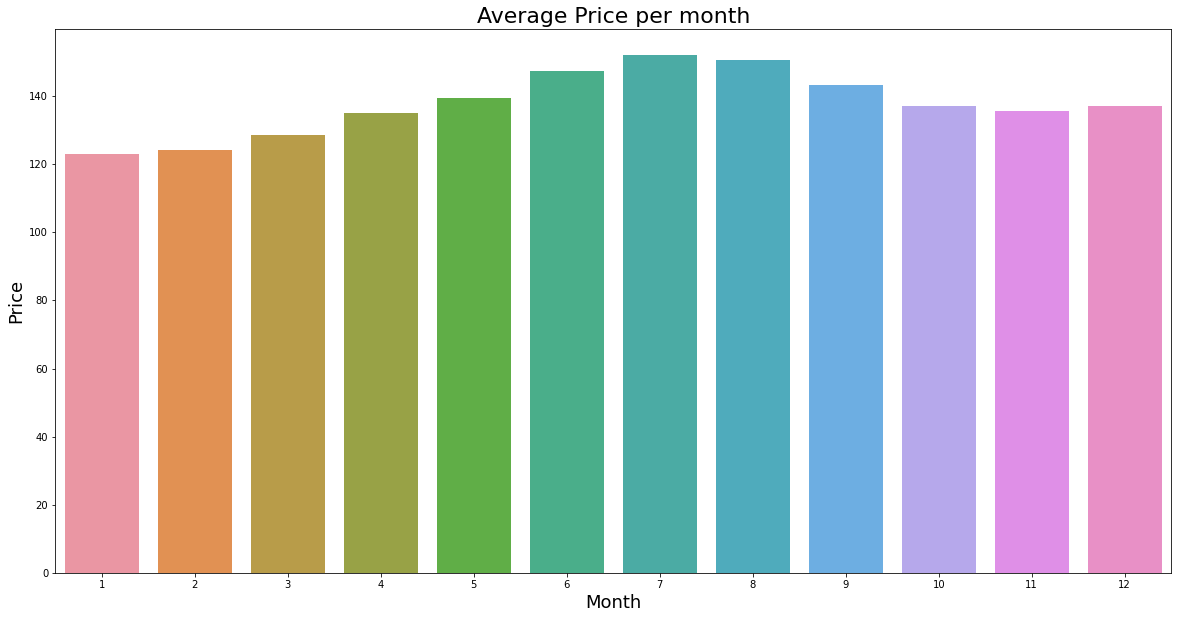

In [17]:
plt.figure(figsize = (20, 10))
sns.barplot(x = avg_price_per_month['month'], y = avg_price_per_month.price);
plt.title('Average Price per month', fontsize = 22)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.show()

In [18]:
freq_per_month = cal.groupby('month')['price'].count().to_frame()
freq_per_month['month'] = freq_per_month.index
freq_per_month.index = np.arange(freq_per_month.shape[0])
freq_per_month

,price,month
0,64937,1
1,73321,2
2,83938,3
3,76037,4
4,79971,5
5,77244,6
6,74222,7
7,76347,8
8,77246,9
9,82438,10


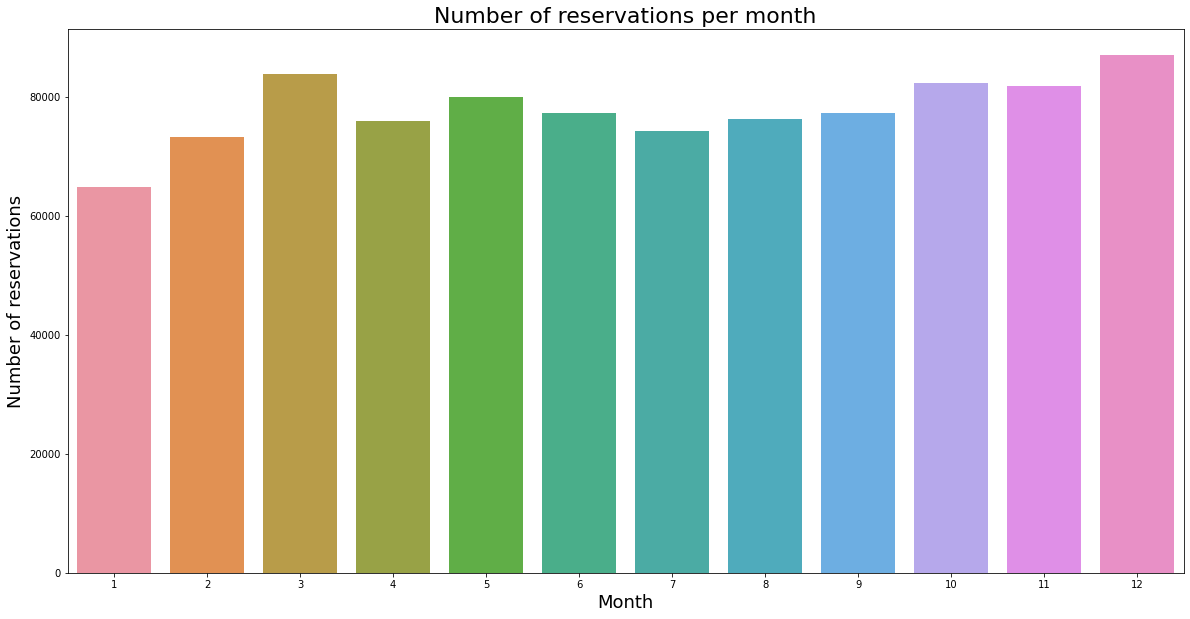

In [19]:
plt.figure(figsize = (20, 10))
sns.barplot(x = freq_per_month['month'], y = freq_per_month.price);
plt.title('Number of reservations per month', fontsize = 22)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Number of reservations', fontsize = 18)
plt.show()

In [20]:
li.shape

(3818, 92)

In [21]:
li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [22]:
listings_missing_avg = li.isnull().mean().to_frame()

In [23]:
listings_missing_avg.columns = ['null_avg']
listings_missing_avg['column'] = listings_missing_avg.index
listings_missing_avg.index = np.arange(listings_missing_avg.shape[0])
listings_missing_avg.head()

,null_avg,column
0,0.0,id
1,0.0,listing_url
2,0.0,scrape_id
3,0.0,last_scraped
4,0.0,name


In [24]:
listings_missing_avg.describe()

,null_avg
count,92.000000
mean,0.084893
std,0.181492
min,0.000000
25%,0.000000
50%,0.000000
75%,0.136983
max,1.000000


In [25]:
li[list(listings_missing_avg[listings_missing_avg['null_avg'] > 0.13]['column'])].head()

,space,neighborhood_overview,notes,transit,host_about,host_response_time,host_response_rate,host_acceptance_rate,square_feet,weekly_price,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,Make your self at home in this charming one-be...,NaN,NaN,NaN,"I am an artist, interior designer, and run a s...",within a few hours,96%,100%,NaN,NaN,...,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,"Beautiful, hypoallergenic apartment in an extr...","Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,NaN,"$1,000.00",...,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,"Our house is modern, light and fresh with a wa...",Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,NaN,NaN,...,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$650.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,"Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,NaN,NaN,...,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89


In [26]:
li.drop(
columns=[
    'space',
    'neighborhood_overview',
    'notes',
    'transit',
    'host_about',
    'square_feet',
    'license'
],axis = 1, inplace=True
)

In [27]:
li.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [28]:
li.host_response_time = li.host_response_time.map({'within an hour':0,
                                                   'within a few hours':1,
                                                   'within a day':2,
                                                   'a few days or more':3}
                                                 )
li[['host_response_time']].head(3)

,host_response_time
0,1.0
1,0.0
2,1.0


In [29]:
li.host_response_time.fillna(4,inplace=True)
li.host_response_time.unique()

array([1., 0., 4., 2., 3.])

In [30]:
li.host_response_time = li.host_response_time.astype(int)

In [31]:
li[['last_review','weekly_price','host_acceptance_rate','host_response_rate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   last_review           3191 non-null   object
 1   weekly_price          2009 non-null   object
 2   host_acceptance_rate  3045 non-null   object
 3   host_response_rate    3295 non-null   object
dtypes: object(4)
memory usage: 119.4+ KB


In [35]:
li.host_acceptance_rate = li.host_acceptance_rate.apply(lambda x:x.replace('%', ''))
li.host_acceptance_rate = li.host_acceptance_rate.astype(float)
li.host_acceptance_rate = li.host_acceptance_rate / 100 
li.host_acceptance_rate.head()

0    1.0
1    1.0
2    1.0
3    NaN
4    NaN
Name: host_acceptance_rate, dtype: float64

In [38]:
li.host_response_rate = li.host_response_rate.apply(lambda x:x.replace('%', ''))
li.host_response_rate = li.host_response_rate.astype(float)
li.host_response_rate = li.host_response_rate / 100 
li.host_response_rate.head()

0    0.96
1    0.98
2    0.67
3     NaN
4    1.00
Name: host_response_rate, dtype: float64

In [41]:
li[['cleaning_fee','security_deposit','monthly_price','weekly_price','price']].head()

,cleaning_fee,security_deposit,monthly_price,weekly_price,price
0,NaN,NaN,NaN,NaN,$85.00
1,$40.00,$100.00,"$3,000.00","$1,000.00",$150.00
2,$300.00,"$1,000.00",NaN,NaN,$975.00
3,NaN,NaN,"$2,300.00",$650.00,$100.00
4,$125.00,$700.00,NaN,NaN,$450.00


In [59]:
prices_columns = ['cleaning_fee','security_deposit','monthly_price','weekly_price','price','extra_people']
for column in prices_columns:
    li[column] = li[column].str.replace('[,$]','', regex=True).astype(float)
    li[column].fillna(0.0, inplace = True)

In [47]:
li[prices_columns].head()

,cleaning_fee,security_deposit,monthly_price,weekly_price,price
0,0.0,0.0,0.0,0.0,85.0
1,40.0,100.0,3000.0,1000.0,150.0
2,300.0,1000.0,0.0,0.0,975.0
3,0.0,0.0,2300.0,650.0,100.0
4,125.0,700.0,0.0,0.0,450.0


In [49]:
listings_missing_avg[listings_missing_avg['null_avg'] > 0]

,null_avg,column
5,0.046359,summary
6,0.149031,space
9,0.270299,neighborhood_overview
10,0.420639,notes
11,0.244631,transit
12,0.083814,thumbnail_url
13,0.083814,medium_url
15,0.083814,xl_picture_url
18,0.000524,host_name
19,0.000524,host_since


In [50]:
li.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'description', 'experiences_offered', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleani

In [58]:
date_columns = ['last_scraped', 'host_since','calendar_last_scraped','first_review','last_review']
for column in date_columns:
    li[column] = pd.to_datetime(li[column])
li[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   last_scraped           3818 non-null   datetime64[ns]
 1   host_since             3816 non-null   datetime64[ns]
 2   calendar_last_scraped  3818 non-null   datetime64[ns]
 3   first_review           3191 non-null   datetime64[ns]
 4   last_review            3191 non-null   datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 149.3 KB


In [76]:
current_columns = li.columns
columns_with_na_values = []
for col in list(listings_missing_avg[(listings_missing_avg['null_avg'] > 0.0) & (listings_missing_avg['null_avg'] < 0.13)]['column']):
    if col in current_columns:
        columns_with_na_values.append(col)
columns_with_na_values

['summary',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds']

In [85]:
li[columns_with_na_values[10:]].head()

,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,zipcode,property_type,bathrooms,bedrooms,beds
0,Queen Anne,3.0,3.0,t,t,Queen Anne,98119,Apartment,1.0,1.0,1.0
1,Queen Anne,6.0,6.0,t,t,Queen Anne,98119,Apartment,1.0,1.0,1.0
2,Queen Anne,2.0,2.0,t,t,Queen Anne,98119,House,4.5,5.0,7.0
3,Queen Anne,1.0,1.0,t,t,Queen Anne,98119,Apartment,1.0,0.0,2.0
4,Queen Anne,2.0,2.0,t,t,Queen Anne,98119,House,2.0,3.0,3.0


In [86]:
li.host_neighbourhood.nunique()

102

In [88]:
useless_columns = ['summary',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_name',
 'host_thumbnail_url',
 'host_picture_url'
]
li.drop(columns=useless_columns, axis = 1, inplace = True)
li.head()

,id,listing_url,scrape_id,last_scraped,name,description,experiences_offered,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,none,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,none,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,none,https://a2.muscache.com/ac/pictures/b4324e0f-a...,16708587,https://www.airbnb.com/users/show/16708587,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,none,https://a0.muscache.com/ac/pictures/94146944/6...,9851441,https://www.airbnb.com/users/show/9851441,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,none,https://a1.muscache.com/ac/pictures/6120468/b0...,1452570,https://www.airbnb.com/users/show/1452570,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89


In [90]:
tf_columns = []
for column in li.columns:
    if li[column][0] in ['t','f']:
        tf_columns.append(column)
tf_columns

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [91]:
for column in tf_columns:
    li[column] = li[column].map({'t':1, 'f':0})
li[tf_columns].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0.0,1.0,1.0,1,1,0,0,0,0
1,1.0,1.0,1.0,1,1,0,0,1,1
2,0.0,1.0,1.0,1,1,0,0,0,0
3,0.0,1.0,1.0,1,1,0,0,0,0
4,0.0,1.0,1.0,1,1,0,0,0,0


In [92]:
li[tf_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_is_superhost                 3816 non-null   float64
 1   host_has_profile_pic              3816 non-null   float64
 2   host_identity_verified            3816 non-null   float64
 3   is_location_exact                 3818 non-null   int64  
 4   has_availability                  3818 non-null   int64  
 5   requires_license                  3818 non-null   int64  
 6   instant_bookable                  3818 non-null   int64  
 7   require_guest_profile_picture     3818 non-null   int64  
 8   require_guest_phone_verification  3818 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 268.6 KB


In [93]:
li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   datetime64[ns]
 4   name                              3818 non-null   object        
 5   description                       3818 non-null   object        
 6   experiences_offered               3818 non-null   object        
 7   picture_url                       3818 non-null   object        
 8   host_id                           3818 non-null   int64         
 9   host_url                          3818 non-null   object        
 10  host_since                        3816 non-null 

In [104]:
li.amenities.unique()

array(['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless I

In [113]:
amenities =  list(li.amenities.unique())
unique_amenities = set()
for amenity in amenities:
    for item in amenity.split(','):
        unique_amenities.add(item.replace('{','').replace('"','').replace('}',''))
unique_amenities

{'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'}

In [115]:
unique_amenities = list(unique_amenities)
unique_amenities

['',
 'Shampoo',
 'Hair Dryer',
 'Wheelchair Accessible',
 'Lock on Bedroom Door',
 'Smoking Allowed',
 'Safety Card',
 'Cat(s)',
 'Smoke Detector',
 'Elevator in Building',
 'Wireless Internet',
 'Indoor Fireplace',
 'Laptop Friendly Workspace',
 'TV',
 'Carbon Monoxide Detector',
 'Doorman',
 'Dryer',
 'Hot Tub',
 'Washer',
 'Pool',
 'Washer / Dryer',
 'First Aid Kit',
 'Buzzer/Wireless Intercom',
 'Suitable for Events',
 '24-Hour Check-in',
 'Gym',
 'Breakfast',
 'Other pet(s)',
 'Heating',
 'Air Conditioning',
 'Internet',
 'Essentials',
 'Cable TV',
 'Dog(s)',
 'Pets Allowed',
 'Iron',
 'Family/Kid Friendly',
 'Hangers',
 'Pets live on this property',
 'Free Parking on Premises',
 'Fire Extinguisher',
 'Kitchen']

In [118]:
for amenity in unique_amenities[1:]:
    li[f'available_{amenity}'] = li['amenities'].map(lambda x: 1 if amenity in x else 0)

In [121]:
corr_matrx = li.corr()
corr_matrx[['price','review_scores_rating','review_scores_communication','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_location','review_scores_value']]

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_10552\637041153.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrx = li.corr()


,price,review_scores_rating,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,review_scores_location,review_scores_value
id,-0.046289,0.039246,0.003389,-0.004710,0.068112,0.045355,0.105444,0.087858
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,-0.051332,0.027348,0.025023,0.022116,0.047576,0.026768,0.073277,0.078829
host_response_time,0.119064,-0.053659,-0.032292,-0.023093,-0.093593,-0.046719,-0.048378,-0.064540
host_response_rate,-0.014071,0.156567,0.155346,0.148516,0.170897,0.130925,0.070827,0.149482
...,...,...,...,...,...,...,...,...
available_Hangers,-0.001306,0.059682,0.054698,0.054789,0.112391,0.051907,0.079330,0.023803
available_Pets live on this property,-0.111069,0.092559,0.057485,0.081953,0.047260,0.072515,0.006280,0.105870
available_Free Parking on Premises,0.079408,0.085832,0.070460,0.091256,0.071839,0.075445,-0.079572,0.104606
available_Fire Extinguisher,0.051444,0.117084,0.058690,0.082511,0.133303,0.069201,-0.012918,0.088228


In [126]:
df = corr_matrx[['price','review_scores_rating','review_scores_communication','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_location','review_scores_value']]

In [136]:
high_corr_review_value = df[(df['review_scores_value'] > 0.1)]['review_scores_value'].to_frame()
high_corr_review_value

,review_scores_value
host_response_rate,0.149482
host_is_superhost,0.221285
review_scores_rating,0.696534
review_scores_accuracy,0.562878
review_scores_cleanliness,0.524354
review_scores_checkin,0.403263
review_scores_communication,0.463772
review_scores_location,0.368252
review_scores_value,1.000000
reviews_per_month,0.126014


In [138]:
targetted_list = list(high_corr_review_value[high_corr_review_value['review_scores_value'] < 0.23].index)
targetted_list.remove('reviews_per_month')
targetted_list

['host_response_rate',
 'host_is_superhost',
 'available_First Aid Kit',
 'available_Pets live on this property',
 'available_Free Parking on Premises']

In [149]:
review_value_df = corr_matrx[targetted_list].loc['review_scores_value',:].to_frame()
review_value_df['Feature'] = review_value_df.index
review_value_df.index = np.arange(review_value_df.shape[0])
review_value_df

,review_scores_value,Feature
0,0.149482,host_response_rate
1,0.221285,host_is_superhost
2,0.101641,available_First Aid Kit
3,0.105870,available_Pets live on this property
4,0.104606,available_Free Parking on Premises


In [151]:
review_value_df = review_value_df.sort_values(by = 'review_scores_value', ascending=False)
review_value_df

,review_scores_value,Feature
1,0.221285,host_is_superhost
0,0.149482,host_response_rate
3,0.105870,available_Pets live on this property
4,0.104606,available_Free Parking on Premises
2,0.101641,available_First Aid Kit


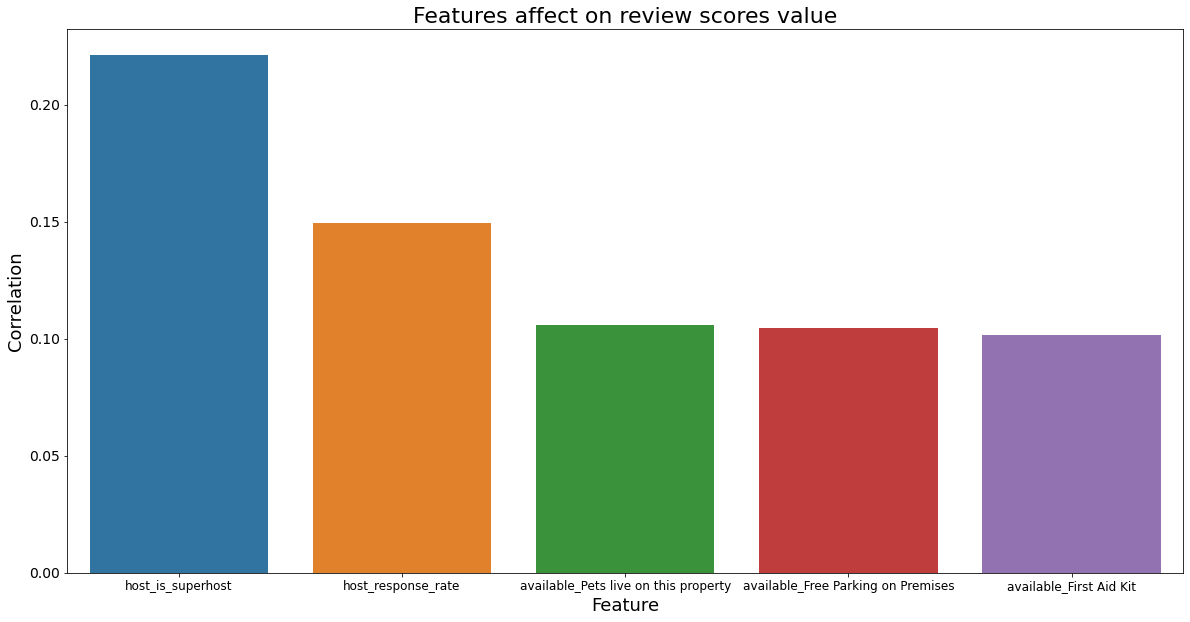

In [157]:
plt.figure(figsize=(20, 10))
sns.barplot(x = review_value_df['Feature'],
           y = review_value_df['review_scores_value']);
plt.title('Features affect on review scores value', fontsize = 22)
plt.xlabel('Feature', fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.ylabel('Correlation', fontsize = 18)
plt.show()

## meaningful features affected on review scores value 
- if the host is super host 22.21%
- also host reponse rate affect with ~ 15%
- pets live , Free parking, and first aid kit ~ 10%
#### Of course, there were other features that affect the review value, but they do not indicate anything like
- review_scores_cleanliness
- review_scores_accuracy
- review_scores_rating

In [171]:
avg_price_per_room_type = li.groupby('room_type')['price'].mean().to_frame()
avg_price_per_room_type['std_price'] = li.groupby('room_type')['price'].std()
avg_price_per_room_type['room_type'] = avg_price_per_room_type.index
avg_price_per_room_type.index = np.arange(avg_price_per_room_type.shape[0])
avg_price_per_room_type

,price,std_price,room_type
0,155.843369,96.551181,Entire home/apt
1,75.044828,34.603905,Private room
2,47.547009,19.372704,Shared room


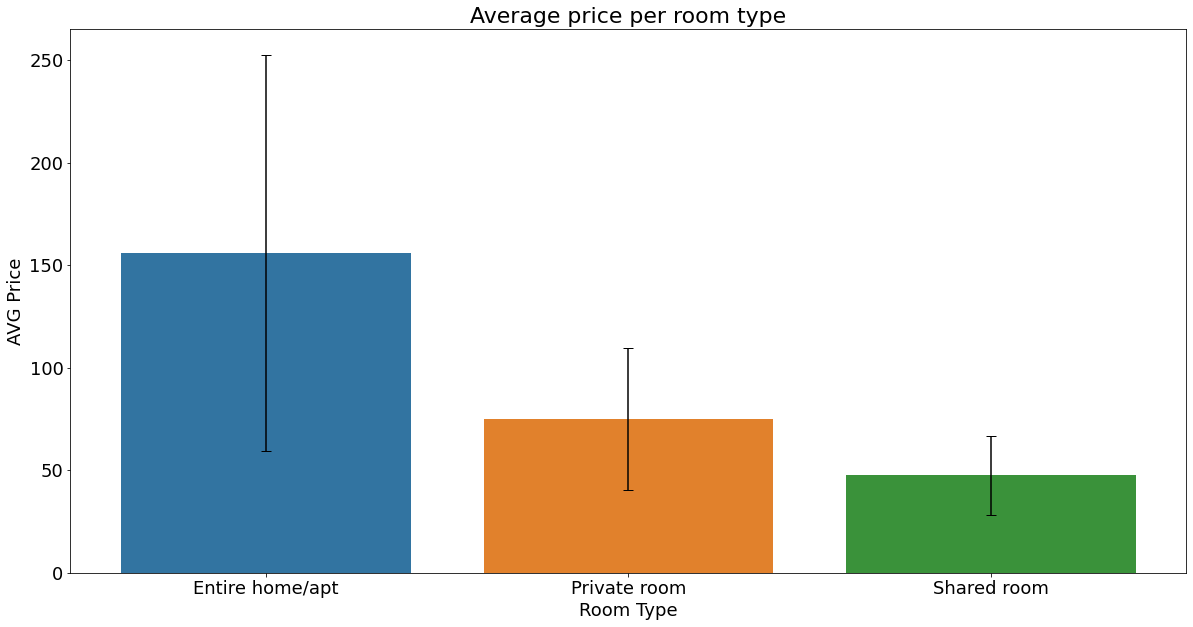

In [174]:
plt.figure(figsize=(20, 10))
sns.barplot(x = avg_price_per_room_type['room_type'],
           y = avg_price_per_room_type['price']);
plt.errorbar(x = avg_price_per_room_type['room_type'],
           y = avg_price_per_room_type['price'], yerr=avg_price_per_room_type['std_price'],
             fmt='none', color='black', capsize=5)
plt.title('Average price per room type', fontsize = 22)
plt.xlabel('Room Type', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('AVG Price', fontsize = 18)
plt.show()

In [175]:
list(li.columns)[:60]

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'experiences_offered',
 'picture_url',
 'host_id',
 'host_url',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60'

In [186]:
corr_matrx[(corr_matrx['price'] > 0.2) | (corr_matrx['price'] < -0.2)]['price']

accommodates                     0.652218
bathrooms                        0.516424
bedrooms                         0.627720
beds                             0.589525
price                            1.000000
weekly_price                     0.394486
monthly_price                    0.275787
security_deposit                 0.333579
cleaning_fee                     0.576423
guests_included                  0.392875
reviews_per_month               -0.218588
available_TV                     0.222488
available_Cable TV               0.237309
available_Family/Kid Friendly    0.259901
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='available_TV'>

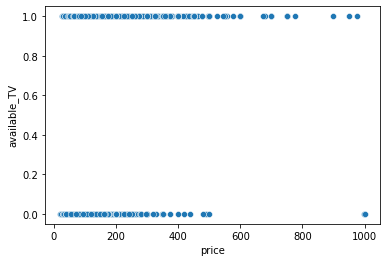

In [192]:
li.groupby('available_TV')

In [187]:
li[[ 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type']]

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type
0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,1,Apartment
1,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,1,Apartment
2,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,1,House
3,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,1,Apartment
4,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,1,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,"Northwest 48th Street, Seattle, WA 98107, Unit...",Fremont,Fremont,Other neighborhoods,Seattle,WA,98107,Seattle,"Seattle, WA",US,United States,47.664295,-122.359170,1,House
3814,"Fuhrman Avenue East, Seattle, WA 98102, United...",Portage Bay,Portage Bay,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.649552,-122.318309,1,Apartment
3815,"South Laurel Street, Seattle, WA 98178, United...",NaN,Rainier Beach,Rainier Valley,Seattle,WA,98178,Seattle,"Seattle, WA",US,United States,47.508453,-122.240607,0,House
3816,"43rd Avenue East, Seattle, WA 98112, United St...",NaN,Madison Park,Capitol Hill,Seattle,WA,98112,Seattle,"Seattle, WA",US,United States,47.632335,-122.275530,0,Condominium
